# Cubisima.com: A Peek At Cuba's (Re-)Emerging Real Estate Market

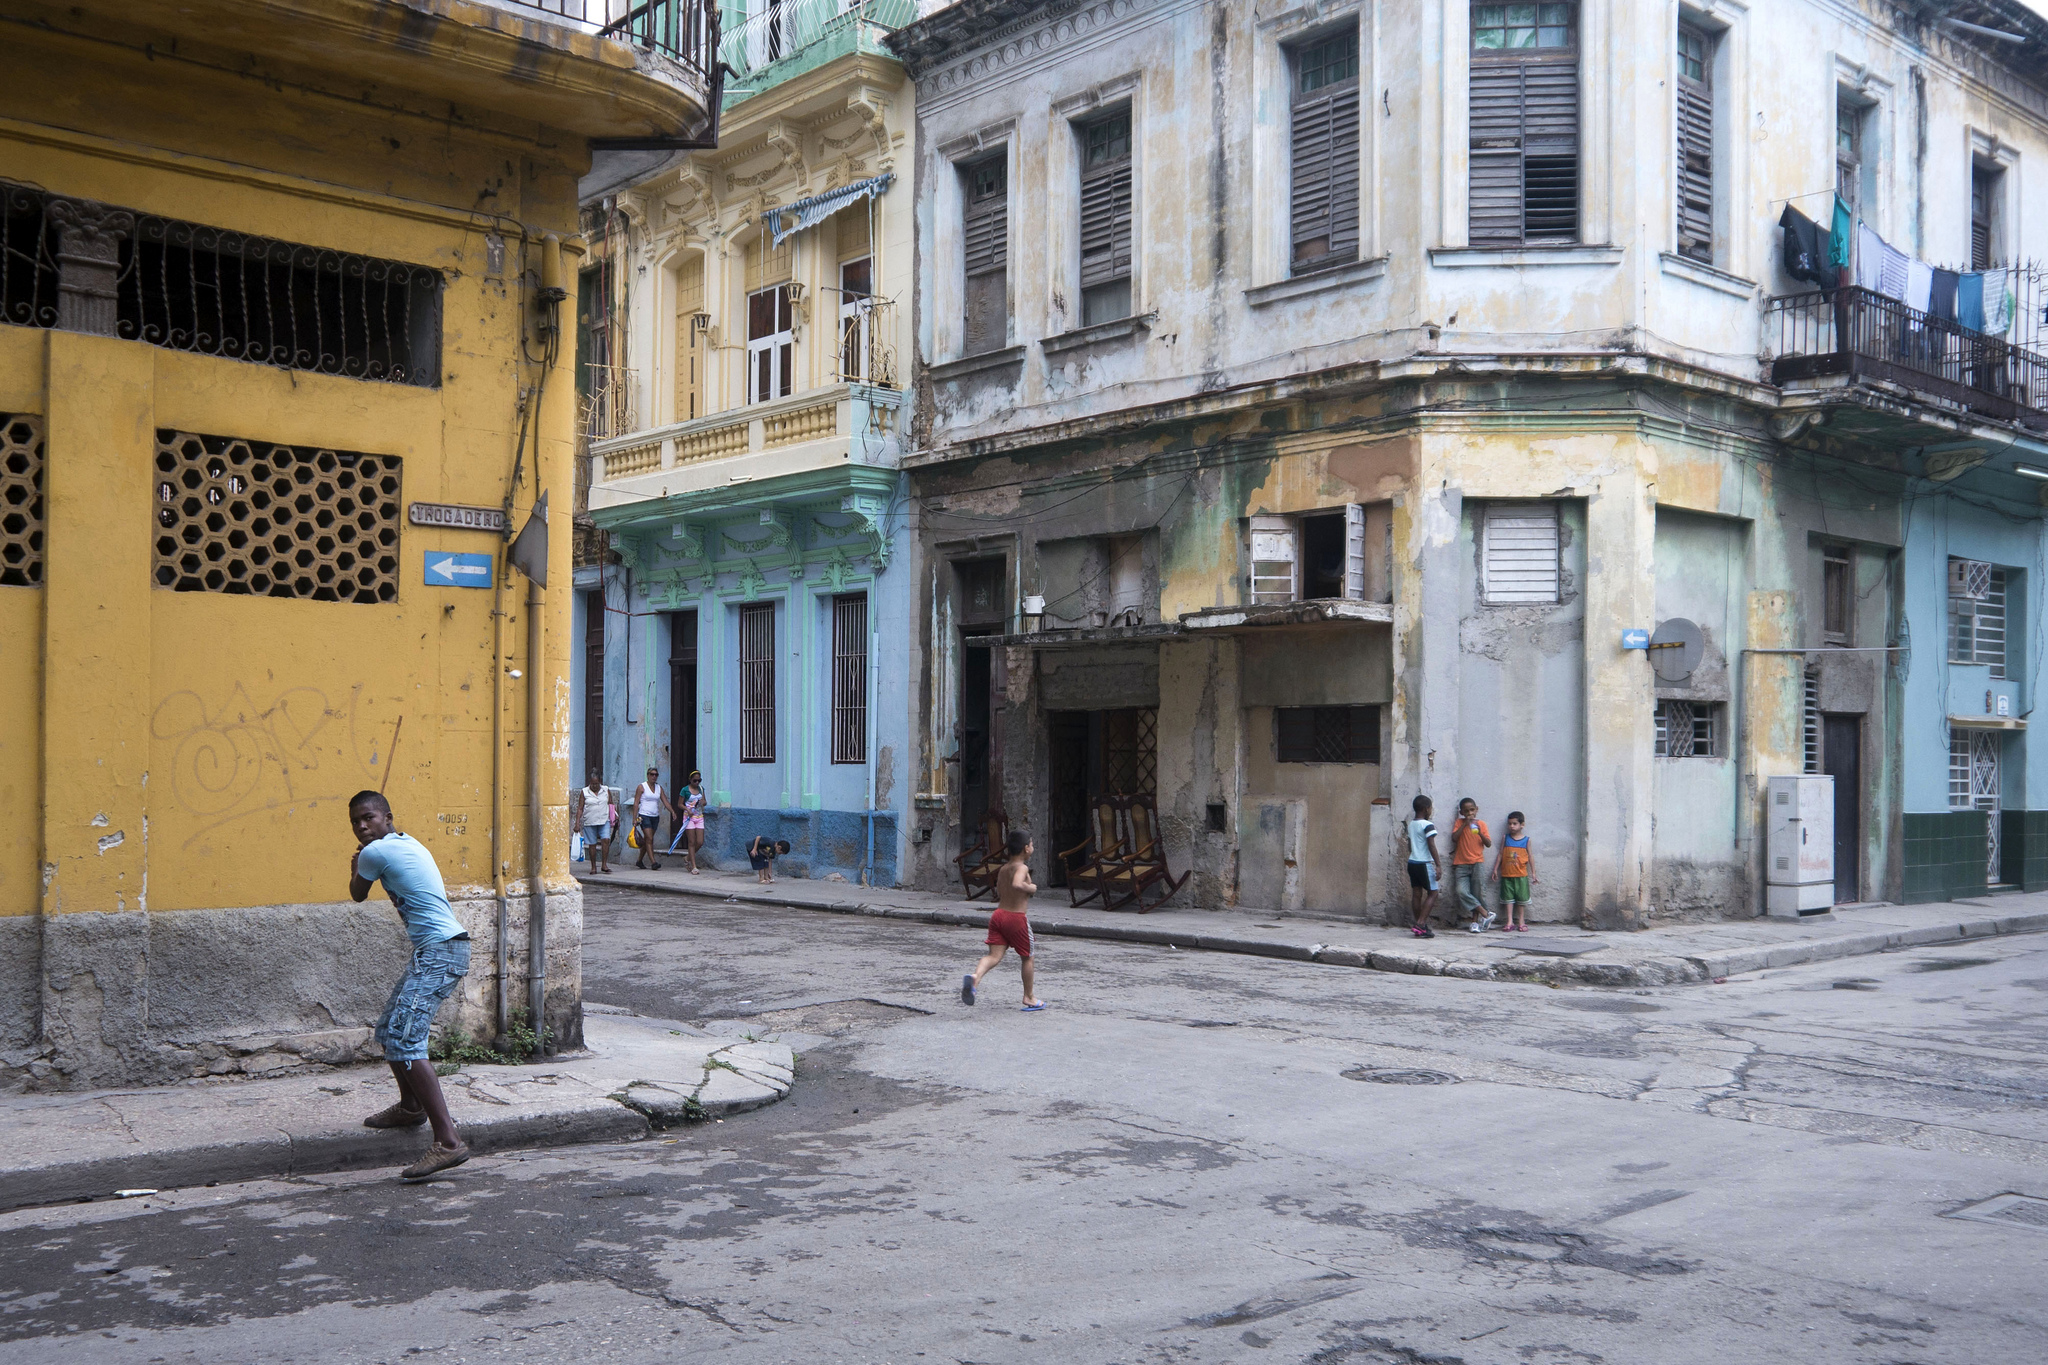

In [1]:
from IPython.display import Image
Image(url='https://farm3.staticflickr.com/2927/14153913565_3bcca9e3b3_k_d.jpg', embed=True)

credit: [Bryan Ledgard](https://www.flickr.com/photos/ledgard/14153913565/in/photolist-8cvfYW-6cv5cF-nwG145-r2Ej71-KLntY-q5WfQk-8E9q6Y-qYSzwB-qYEJZu-nheH64-6cPSzE-nyJJeQ-r4egXH-nheLT7-dePQuN-nheTBf-KkPpu-6dq2pw-q7W88V-nAviXM-oLFMfq-nyJp5D-nyJS7J-6ci2xK-reoBTx-pqTwWW-qFN38B-qQW1hL-nyJpSF-oUmfpN-nheR9G-5DAJWT-5T33DV-3tonQ-yPdKf-6pyoif-nheNit-nwFDPh-nwFKnG-nyJvov-e7cNq-dVz1Vo-njUFJB-bSeBbx-nhf28N-mNDTZe-8Xskvy-nheKfh-dT1RFR-nyJQcS/)



# NOTE: THIS ANALYSIS IS A WORK-IN-PROGRESS, PLEASE DO NOT CIRCULATE.

At the close of 2011, Cuba took the biggest step towards capitalism since the Revolution: it revived its real estate market.

After fifty years, ordinary Cubans were once again able to buy and sell their homes. Billions of dollars of property, undervalued for decades, was suddenly open for sale.

### Why Reform Matters

The historical significant of these reforms cannot be overstated.

The liberalization of real estate in Cuba isn't just a big deal because real estate is a huge slice of the economy, and that slice is now governed by markets. 

It's a big deal because the free exchange of property is the very foundation of a market economy. For the an economy to thrive, land must be flexibly allocated: businesses must be allowed to buy space to house their economic activities. People must be able to move close to those jobs.

The potential impacts on the island are profound. Property tends to generate wealth, which could be refunneled as capital to kickstart Cuba's economy. That could lift living standards, but also concentrate wealth in the hands of a few. The re-emergence of class could reshape cities, as the wealthy move to more desirable neighbhorhoods and the poor are left behind.


### Cuba's Peculiar New Market

For now, however, Cuba's fledgling real estate market is off to a rather unusual start:

* Despite widespread poverty, 84% of households own their homes.

* There's no history of transactions to guide prices, so prices for comparable properties can vary wildly.

* There's no mortgage lending, so all purchases must be done in cash. But nearly nobody has cash. That hampers demand in a big way: people can't afford to buy their first house to start a family, or upgrade their small apartment for a bigger one.

* Most buyers are older people who want to buy a smaller house after selling their current one, or locals receiving money from family abroad. This bifurcated demand has affect supply: some sellers are "serious", intent on moving or downsize their homes, other post inflated prices just in case a foreigned-backed seller comes along.

The result: prices are high for the average Cuban, and most can't afford to buy - despite the vast majority being owners.

*Source: [Brookings Institute](http://www.brookings.edu/~/media/research/files/reports/2014/02/21-cuba-real-estate/phil-peters-cubas-new-real-estate-market.pdf)*

### Capitalist Reform: There's An App for That
Most of the world's socialist economies liberalized after the fall of the Berlin Wall. But because Raul Castro initiated reforms in 2011, instead of 1991, Cuba's real estate market was (re)born digital.

Online marketplaces cropped up within weeks, producing precious data exhaust and creating an unprecendeted oppotunity to observe the re-emergence of a real estate market in a country that hasn't had one in over half a century.

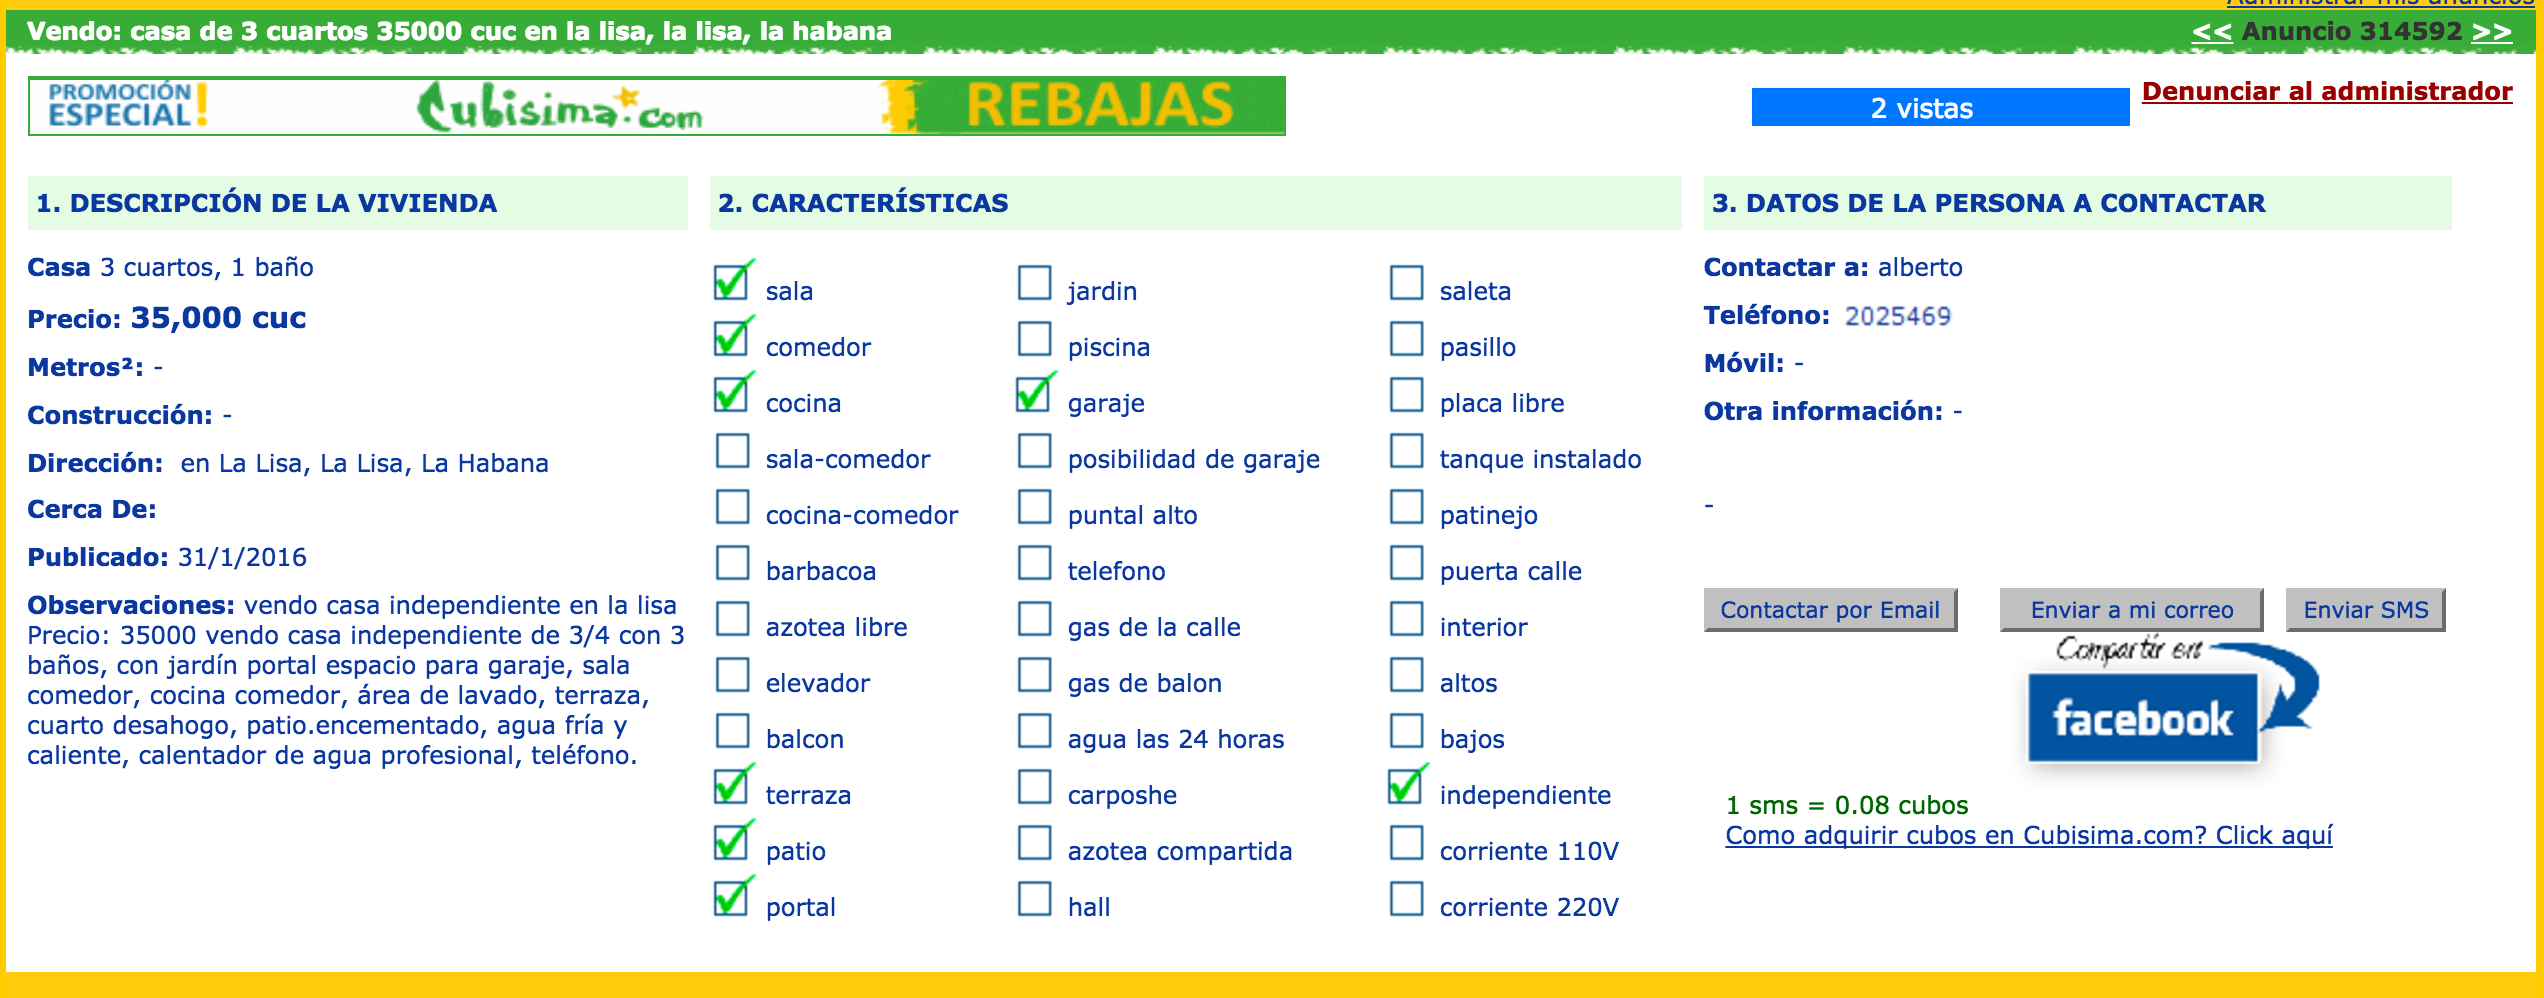

In [2]:
 Image(filename='cubisima_listing_screenshot.png')

[A typical listing on Cubisima.com](http://www.cubisima.com/casas/casa-de-3-cuartos-35000-cuc-en-la-lisa-la-lisa-la-habana!314592.htm)
    

Cubisima.com is Cuba's answer to craigslist - an online classifieds service listing everything from laptops to short-term gigs. 

The property listings are full of interesting information, including:
- The type of property for sale: houses, apartments, etc.
- The number of bedrooms, bathrooms, and (ocassionally) the floor area in meters squared
- The asking price
- The neighborhood, city, and province the property is located in
- The date the listing was initially published
- Property amenities covering everything from "running water" to "barbeque pit"
- Seller's name and number 
- Photographs of the property (optionally)

### From Website to Dataset

Listings don't appear to be taken off the site after they are posted. 

So I wrote a scraper to download 50,000 listings posted on the site between summer 2011, right before the reform, and summer 2014. (I'm currently working on getting data for the last year and a half.)

Then I wrote a script to extract a listings details from the HTML of these pages.


This resulting dataset will allow us take the first quantiative peek at Cuba's new real estate market.

What sort of market emerges where there isn't any? Is it growing? What type of property is being sold? Hold much is it going for? And what are the key drivers of price?

Without further ado, let's read in the data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
sns.set(style="whitegrid")
sns.set_color_codes('pastel')
from sklearn import cross_validation
from sklearn import metrics

In [4]:
raw_listings = pd.read_csv('../data/listings.csv')

## How many properties have been listed on Cubisima.com since the reforms?

In [5]:
def convert_pub_date(listings):
    '''
    Convert publication date to daytime. Listings posted on day scraper
    ran display time of posting - i.e. "8:35 am" - instead of the date ~
    24/12/2011. These must be transformed.
    '''
    # Get datetime of when the scraper ran.
    listings = listings.copy() # So this function can be rerun.
    listings_no_today = listings[~listings.pub_date.str.contains('am')]
    today = pd.to_datetime(listings_no_today.pub_date).max()
    # Set strings with format '8:35 am' to scraper run date.
    has_am = listings.pub_date.str.contains('am')
    listings.loc[has_am, 'pub_date'] = today
    # Convert all publication dates to to datetime.
    listings.loc[:,'pub_date'] = pd.to_datetime(listings['pub_date'])
    return listings

In [6]:
# Convert publication date to datetime.
listings_dt = convert_pub_date(raw_listings)
# Missing some listings after July 2014, so remove them.
lt_aug_2014 = listings_dt.pub_date < '08-01-2014'
gt_nov_2011 = listings_dt.pub_date >= '11-01-2011'
listings_since_reform = listings_dt[gt_nov_2011 & lt_aug_2014]

In [7]:
listings_since_reform.shape[0]

60365

**60,365 properties** were advertised on Cubisima.com between Nov 2011, when the reform were announced, and July 2014, the last month we current have data for.

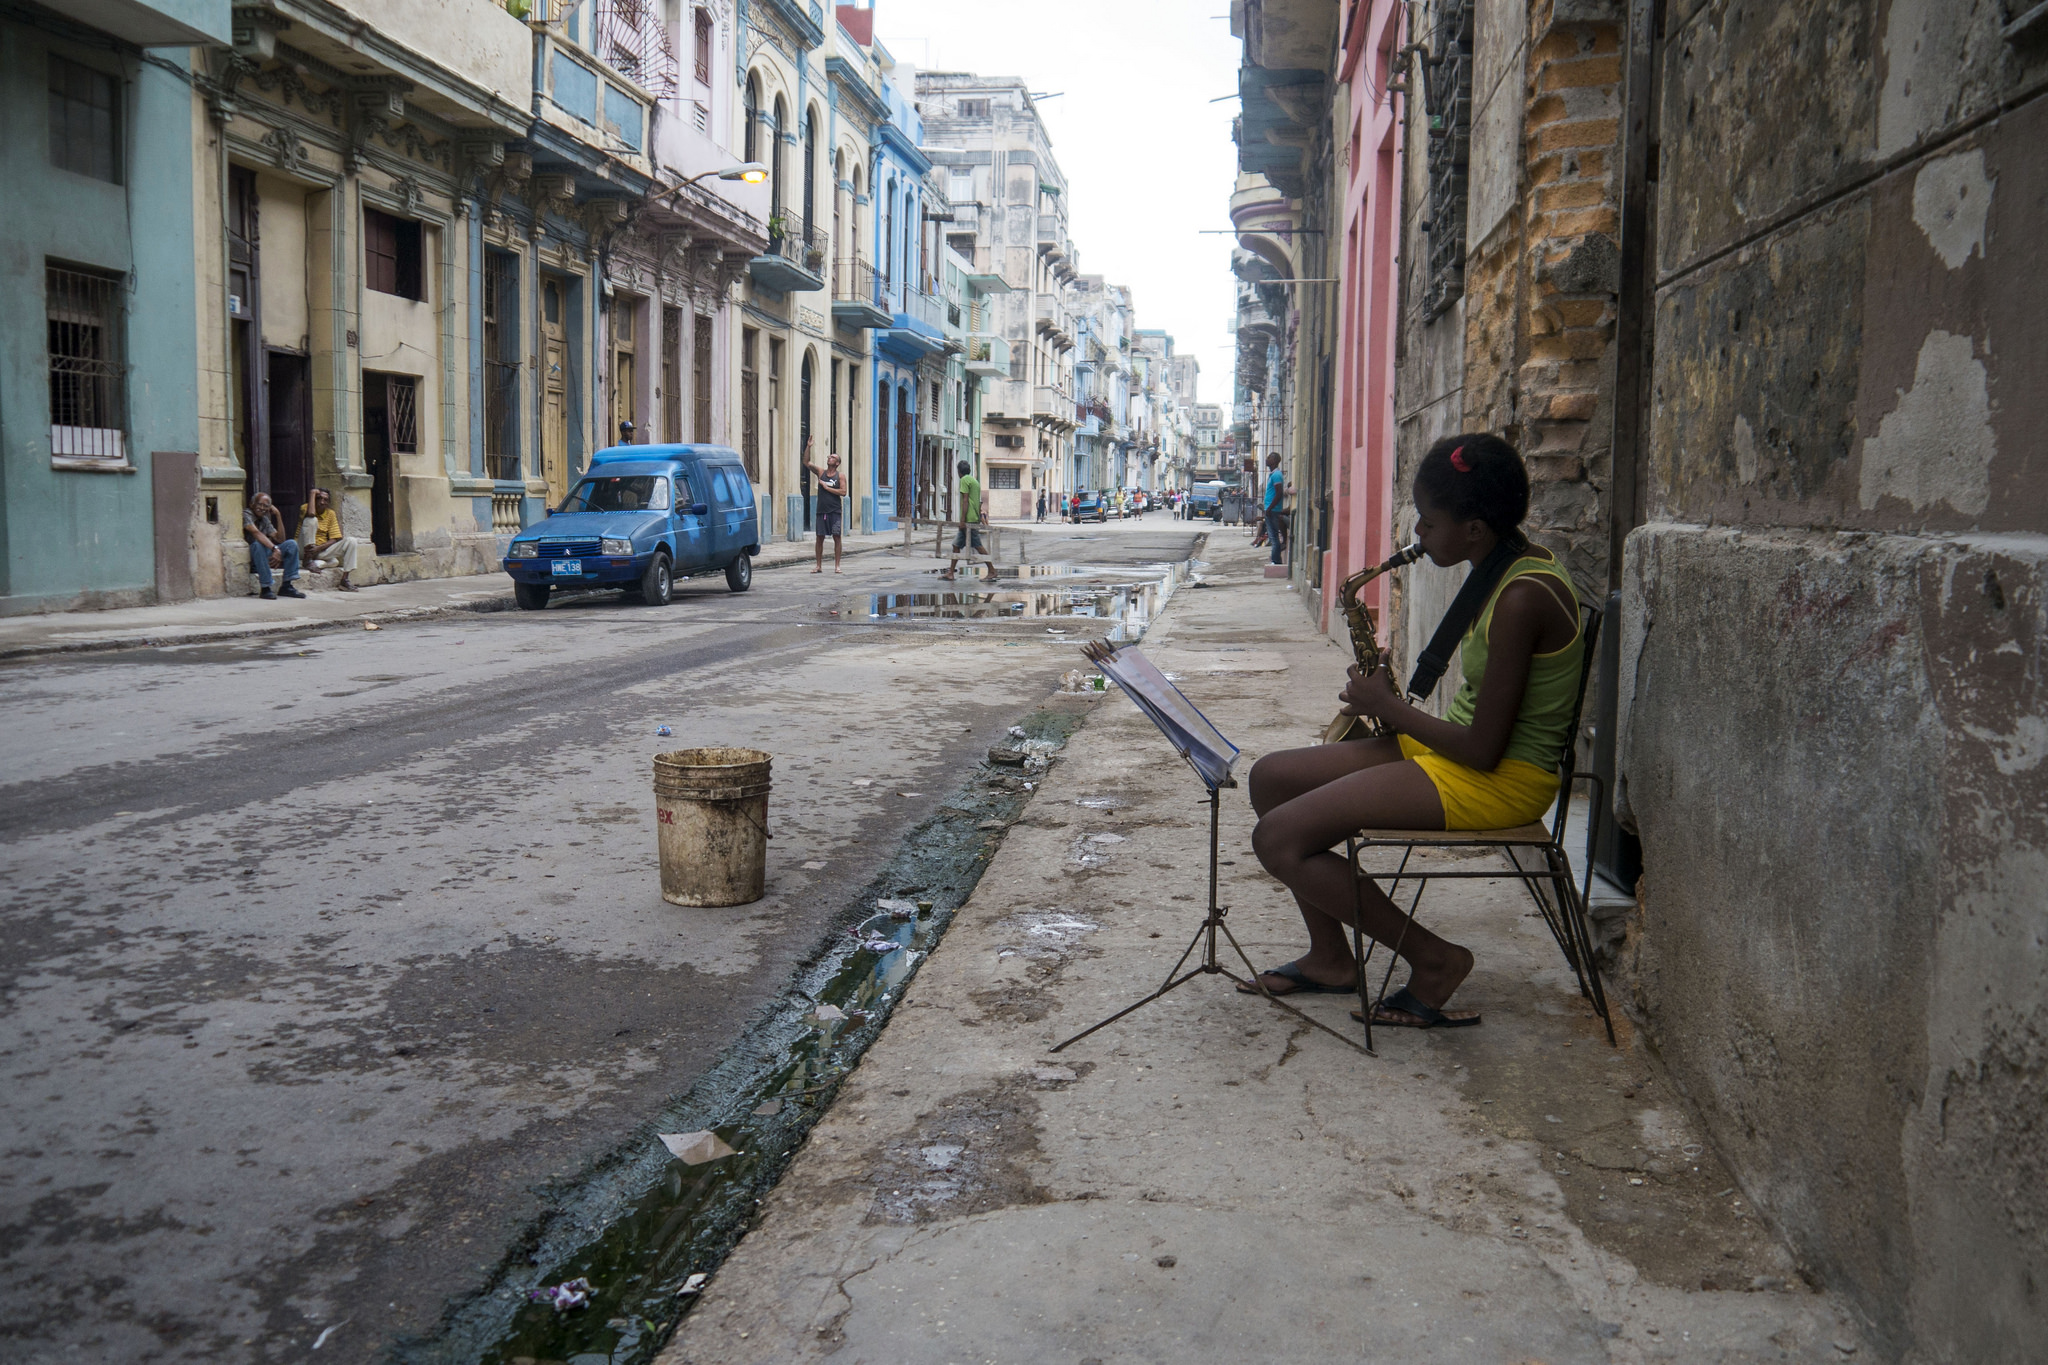

In [8]:
Image(url='https://farm8.staticflickr.com/7329/13997468547_864d022bb6_k_d.jpg', embed=True)

credit: [Bryan Ledgard](https://www.flickr.com/photos/ledgard/14153913565/in/photolist-8cvfYW-6cv5cF-nwG145-r2Ej71-KLntY-q5WfQk-8E9q6Y-qYSzwB-qYEJZu-nheH64-6cPSzE-nyJJeQ-r4egXH-nheLT7-dePQuN-nheTBf-KkPpu-6dq2pw-q7W88V-nAviXM-oLFMfq-nyJp5D-nyJS7J-6ci2xK-reoBTx-pqTwWW-qFN38B-qQW1hL-nyJpSF-oUmfpN-nheR9G-5DAJWT-5T33DV-3tonQ-yPdKf-6pyoif-nheNit-nwFDPh-nwFKnG-nyJvov-e7cNq-dVz1Vo-njUFJB-bSeBbx-nhf28N-mNDTZe-8Xskvy-nheKfh-dT1RFR-nyJQcS/)



## How much of the market does this represent?

By comparison, the Cuban government reported **80,000 completed property sales** in the first 11 months of 2013, according to a [2014 study](http://www.brookings.edu/~/media/research/files/reports/2014/02/21-cuba-real-estate/phil-peters-cubas-new-real-estate-market.pdf) by the Brookings Institution.

It's safe to assume that in these early days, only a small fraction of properties advertised on the site end up selling. (We can't tell from listings data which properties actually sold.) And it's very possible that some properties were listed multiple times in 2013. (I haven't yet tried to identify and remove duplicate listings.)

But the fact that 3 properties were listed for every 4 that sold across the island during that period suggest we may be capturing a decent sample of the market. If we assume one of every 50 properties listed on Cubisima.com eventually sold, then 1.5% of properties purchased during the period appeared on the site.

## Has the number of listings grown over time?

To whatever extent Cubisima reflects Cuba, a growing number of classifieds on the site could reflect the growth of the island's fledging property market. So next, let's take a look at listings over time.

In [9]:
# Make time series of listings per week.
listings_since_reform_ts = listings_since_reform.set_index(listings_since_reform.pub_date)
ts_listing_counts = listings_since_reform_ts['id'].resample('W', how='count')

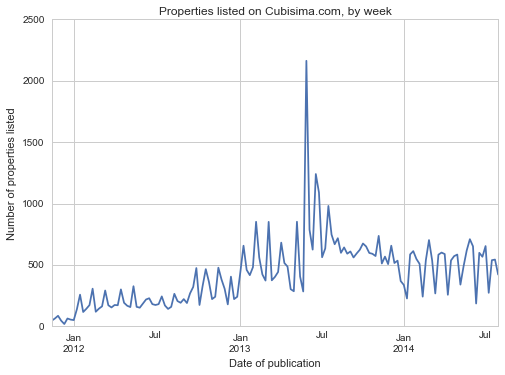

In [10]:
# Plot time series.
ts_listing_counts.plot()
plt.xlabel('Date of publication')
plt.ylabel('Number of properties listed')
plt.title('Properties listed on Cubisima.com, by week')

This plot shows the number of listings posted to the site every week.

Though not visible here, the earliest listings on Cubisima date from July 2011, months before property sales became legal on the island. (There are too few listings from this pre-reform period, however, for us to compare properties before vs. after.)


New listings jumped to 100-200 per week immediately Raul Castor announced the reforms in November 2011. They grew slowly during 2012, and then roughly doubled at the start of 2013. As of mid 2014, the number of new listings per week had stabilized at around 400 listings per week.

Notice, however, that listings tend to spike once month, and that size of this periodic variation grows over the years.

Before we can dig further, we must clean our dataset.

In [11]:
def clean_listings(listings):
    '''Coerce columns to have property data types.'''
    # Convert asking price from string to float. 
    # This dropes ~13K/63K listings with no asking price info.
    listings.loc[:, 'price'] = listings.price.str.replace(',','').astype(float).copy()
    # Remove price outliers from dataset.
    gt_min_price = listings.price > 1000
    lt_max_price = listings.price < 200000
    listings = listings[gt_min_price & lt_max_price]
    # The site allows people to list half rooms. Take the floor to simplify the data.
    listings.loc[:, 'num_bed'] = listings.num_bed.apply(lambda s: int(np.floor(s)))
    # Make properties with 0 rooms have 1, and ones with >5 have 5+.
    # Make number of rooms into a categorical variable because
    # the relationship with y isn't linear.
    listings.loc[:, 'num_bed'] = np.clip(listings.num_bed, 1, 5).astype(str).replace(to_replace='5', value='5+')
    # Make properties with 0 bathrooms have 1, and ones with >4 have 4+.
    # Make number of rooms into a categorical variable because
    # the relationship with y isn't linear.
    listings.loc[:, 'num_bath'] = np.clip(listings.num_bath, 1, 4).apply(lambda s: str(int(s))).replace(to_replace='4', value='4+')
    # Convert blank listings notes to NaN.
    has_dash = (listings.notes == '-')
    listings.loc[has_dash, 'notes'] = np.NaN
    # Translate amenity columns to english.
    amenity_dict = {'azotea compartida': 'amenity_shared_rootop', 'balcon': 'amenity_balcony', 'corriente 220V': 'amenity_electricity_200V',
                    'sala-comedor': 'amenity_combined_living_and_dining_room', 'cocina': 'amenity_kitchen', 'piscina': 'amenity_pool',
                    'agua las 24 horas': 'amenity_water_all_day', 'garaje': 'amenity_garage', 'gas de balon': 'amenity_gas_tank',
                     'independiente': 'amenity_independent', 'patio': 'amenity_patio', 'tanque instalado': 'amenity_water_tank',
                     'bajos': 'amenity_bajos', 'telefono': 'amenity_telephone', 'placa libre': 'amenity_placa_libre',
                     'posibilidad de garaje': 'amenity_garage_possible', 'pasillo': 'amenity_hallway',
                     'corriente 110V': 'amenity_electricity_110V', 'interior': 'amenity_interior', 'puntal alto': 'amenity_high_ceilings',
                     'elevador': 'amenity_elevator', 'azotea libre': 'amenity_free_roof', 'terraza': 'amenity_terrace',
                     'patinejo': 'amenity_ventilation_shaft', 'puerta calle': 'amenity_street_facing_door', 'portal': 'amenity_portal',
                     'gas de la calle': 'amenity_gas_line', 'cocina-comedor': 'amenity_combined_kitchen_dinning_room', 'hall': 'amenity_hall',
                     'altos': 'amenity_altos', 'saleta': 'amenity_small_room', 'comedor': 'amenity_dining_room',
                     'barbacoa': 'amenity_barbeque', 'jardin': 'amenity_garden', 'carposhe': 'amenity_carposhe', 'sala': 'amenity_living_room'}
    listings.rename(columns=amenity_dict, inplace=True)
    # Translate property types to english.
    property_dict = {'property_type': {'Casa': 'House', 
                                       'Apartamento': 'Apartment',
                                       'Habitacion': 'Room',
                                       'Terreno': 'Empty Lot',
                                       'Prop  horizontal': 'Co-op'
                                      }}
    listings.replace(to_replace=property_dict, inplace=True)
    return listings

In [12]:
def make_additional_variables(listings):
    '''Construct additional listing variables from scraped data.'''
    # Construct day of week, month, and year variables.
    listings.loc[:, 'year'] = listings.pub_date.dt.year.astype(str)
    listings.loc[:, 'month'] = listings.pub_date.dt.month.astype(str)
    listings.loc[:, 'day_of_week'] = listings.pub_date.dt.dayofweek.astype(str)
    # Construct neighborhood and city variables.
    has_location = ~listings.location.isnull()
    listings.loc[:, 'province'] = listings[has_location].location.apply(lambda v: str(v).split(', ')[-1])
    listings.loc[:, 'province'] = listings.province.fillna('La Habana')
    listings.loc[:, 'city'] = listings[has_location].location.apply(lambda v: str(v).split(', ')[-2].split('en ')[-1])
    return listings

In [13]:
listings = make_additional_variables(clean_listings(listings_since_reform))

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/generic.py:3050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [14]:
listings.shape

(46869, 58)

Just over 20% of listings on Cubisima.com lack price information, so let's drop those records and focus on the universe of properties with listed prices. That leaves us with **46,869 properties** to analyze.

Let's also make some new variables. We can derive the day of week, month, and year a listing was first posted on the site from its publication date. And we can extract the city and provicence where each property is location from the "location" field of listings.

## What kind of properties are being listed on the site?

Cubans haven't been able to sell their residences since the early 1960s. Now that they suddenly can, what types of properties are they putting on the market?


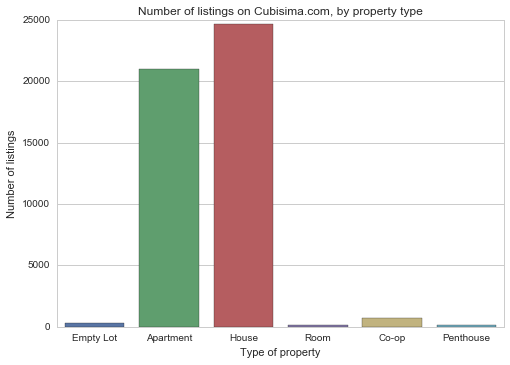

In [15]:
sns.countplot(listings.property_type)
plt.title('Number of listings on Cubisima.com, by property type')
plt.xlabel('Type of property')
plt.ylabel('Number of listings')

In [16]:
(listings.property_type.value_counts() / listings.shape[0]) * 100

House        52.693678
Apartment    44.758796
Co-op         1.461520
Empty Lot     0.569673
Room          0.279502
Penthouse     0.236830
Name: property_type, dtype: float64

Houses and apartments make up **96% of properties** on the site.

"Horizonal properties," Cuba's answer to Co-op apartments, are in (very distant) third place, with 1.5% of listings. Empty lots, single rooms, and luxury penthouses occasionally make an appearance.

Since houses and apartments dominate our dataset, let's focus on them and drill down further.

## How many rooms do these properties have?

In [17]:
is_house = listings.property_type == 'Apartment'
is_apt = listings.property_type == 'House'
houses_and_apts = listings[is_house | is_apt]

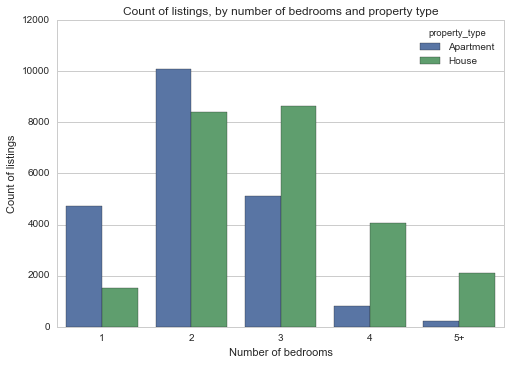

In [18]:
sns.countplot('num_bed', hue='property_type', data=houses_and_apts)
plt.xlabel('Number of bedrooms')
plt.ylabel('Count of listings')
plt.title('Count of listings, by number of bedrooms and property type')

Most apartments on sale have 1-3 bedrooms, while most houses have 2-4. 

Not an earth shattering finding, or a vastly different from American cities. But a good sanity check that raises our confidence in the accuracy of Cubisima's listings.

## What can we learn from the number of bathrooms?

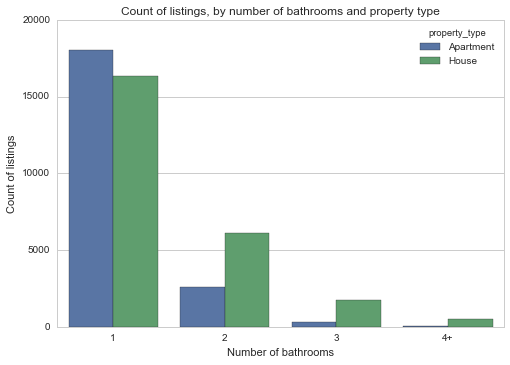

In [19]:
sns.countplot('num_bath', hue='property_type', data=houses_and_apts)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count of listings')
plt.title('Count of listings, by number of bathrooms and property type')

In [20]:
ct = pd.crosstab(houses_and_apts.num_bath, [houses_and_apts.property_type, houses_and_apts.num_bed])
ct

property_type Apartment                      House                       
num_bed               1     2     3    4  5+     1     2     3     4   5+
num_bath                                                                 
1                  4679  9053  3890  307  88  1494  7442  5507  1388  484
2                    48  1010  1059  379  67    29   897  2659  1867  673
3                     1    24   151  115  45     3    45   404   682  599
4+                    9     5     2   21  25     2    19    45   123  335

85% of apartments have only 1 bathroom. 66% of houses have only 1 bathroom, despite 59% having three or more bedrooms, reflecting perhaps Cuba's lower standard of living.

## Where are Cubisima's properties located?

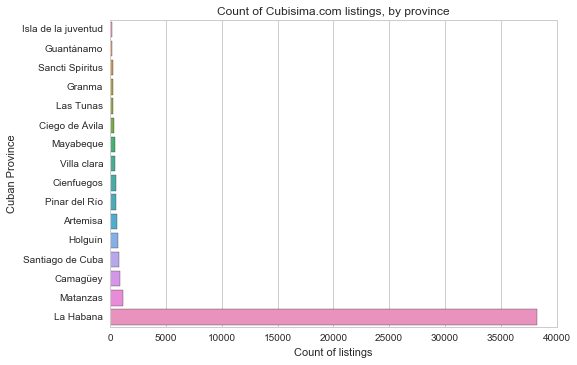

In [21]:
listings_by_province = houses_and_apts.province.value_counts().sort_values()
sns.barplot(y=listings_by_province.index, x=listings_by_province)
plt.ylabel('Cuban Province')
plt.xlabel('Count of listings')
plt.title('Count of Cubisima.com listings, by province')

In [22]:
houses_and_apts.province.value_counts()['La Habana'] / houses_and_apts.shape[0]

0.83636562671045434

38,000 listings, or 83% of the properties on Cubisima.com, are in the "La Habana" province, which covers the City of Havana and its neighboring suburbs.

The vast majority of users are from Cuba's capital, and small numbers use the site in every other province.

There are only 1,1172 listings in Matanzas, the runner up, while most provinces have well under a thouand. Those are pretty small sample sizes. Therefore, to simplify our analysis going foward, we'll label all non-Havana provinces and cities as "Outside Havana":

In [23]:
def simplify_location_fields(listings):
    # Label all non-Havana provices and cities
    in_havana = listings.province.str.contains('La Habana')
    listings.loc[~in_havana, 'province'] = 'Outside Havana'
    listings.loc[~in_havana, 'city'] = 'Outside Havana'
    # Label "any city" value as outside Havana.
    listings.loc[listings.city == 'Cualquiera', 'city'] = 'Outside Havana'
    return listings

In [24]:
houses_and_apts = simplify_location_fields(houses_and_apts)
houses_and_apts.province.value_counts()

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


La Habana         38201
Outside Havana     7474
Name: province, dtype: int64

## What amenities are prevalent across these properties?

Cubisima classifieds feature detailed lists of property amenities. Let's look at which ones are most prevalent.

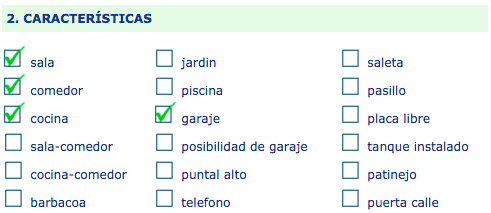

In [25]:
 Image(filename='cubisima_amenities_screenshot.png')

In [26]:
amenity_variables = [col_name for col_name in listings.columns.tolist() if 'amenity' in col_name]
listing_amenities = houses_and_apts[amenity_variables]

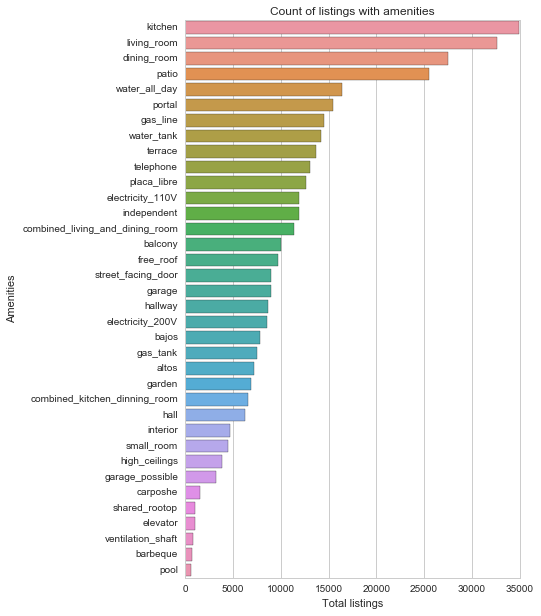

In [27]:
num_listings_by_amenity = listing_amenities.sum(axis=0).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x=num_listings_by_amenity, y=num_listings_by_amenity.index)

# Clean up amenity names.
labels = [item.get_text().replace('amenity_', '') for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.xlabel('Total listings')
plt.ylabel('Amenities')
plt.title('Count of listings with amenities')

The top four amenities are kitchen, living room, dining room and patio, and the majority of listings have all four.

Interestingly, the next most frequently mentioned amenities are services like gas, water, and electricity.

Near the bottom lurk luxuries like elevators, barbeques, and pools.

## How much are properties selling for?

Any New Yorkers reading this analysis are surely itching to know: "how much is a one bedroom apartment in Havana?"

Now, for the moment you've all been waiting for. Let's take a look at the prices in the world's newest real estate market.

**Caveat alert**

The thing to keep in mind is that Cubisima listings don't tell you whether the property actually sold, and how much it sold for. It only tells you how much money sellers asked for.

Think of this study less as quantifying Cuban real estate prices - not directly, anyway - and more as quantifying the price desires of sellers on Cubisima.com.

**A note on currency**

All listing prices are in Cuban Convertible Peso or CUC, which are equivalent to U.S. dollars.

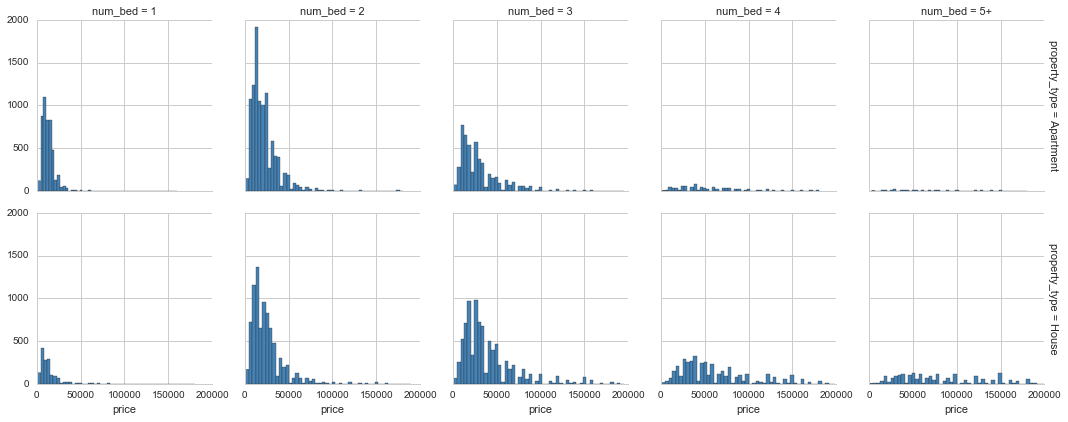

In [28]:
g = sns.FacetGrid(houses_and_apts, row="property_type", col="num_bed", margin_titles=True)
g.map(plt.hist, "price", color="steelblue", bins=50)

The histograms above show the distribution of prices, broken out by the bedroom and property type.

The violin plot below shows the same use the same data, but makes it easier to compare the distributions. (The dotted lines on each distribution represent the 25% median, median, and 75% percentile.)

(-1000, 230000)

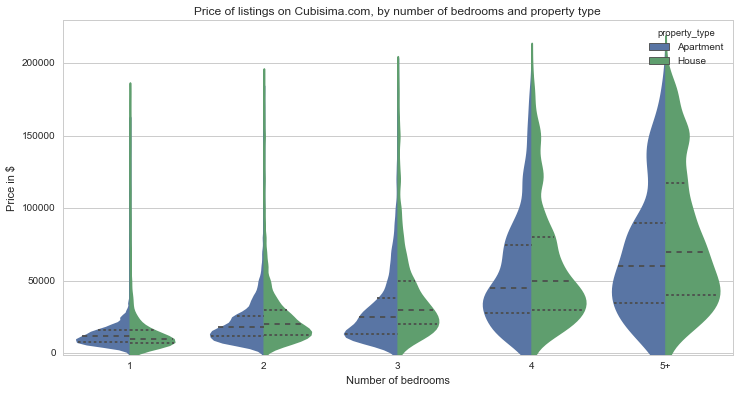

In [29]:
plt.figure(figsize=(12,6))
sns.violinplot(x='num_bed', y='price', hue='property_type', data=houses_and_apts, split=True, inner="quart")

plt.title('Price of listings on Cubisima.com, by number of bedrooms and property type')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price in $')
plt.ylim((-1000, 230000))

A few price trends emerge:

1. As the number of **bedrooms goes up, so does price**: The median price for a 1 bedroom apartment is \$12,000, \$18,000 for 2 bedrooms, \$25,000 for 3, \$45,000 for 5, and \$60,000 for 5. The median price for a 1 bedroom house is \$10,000, \$20,000 for 2 bedrooms, \$30,000 for 3, \$50,000 for 4, and \$70,000 for 5.

2. However, the relationship is not linear - the mean sales doesn't go up by the same amount with every bedroom you add.

2. The greater the number of rooms, the **higher the variation** in prices.

3. **Homes tend to have higher median sales prices** than apartments, when they have 2 or more bedrooms. They have also slightly heavier tails - for properties with 3 rooms or more, the 75th percentile house price is usually many thousands of dollars more than the 75th percentile apartment price.

4. No matter the property type and number of bedrooms, all listings prices are **positively-skewed**, and there are lots of high-priced outliers. This will affect our ability model prices down the road. To remove the skew, we **log the prices**:


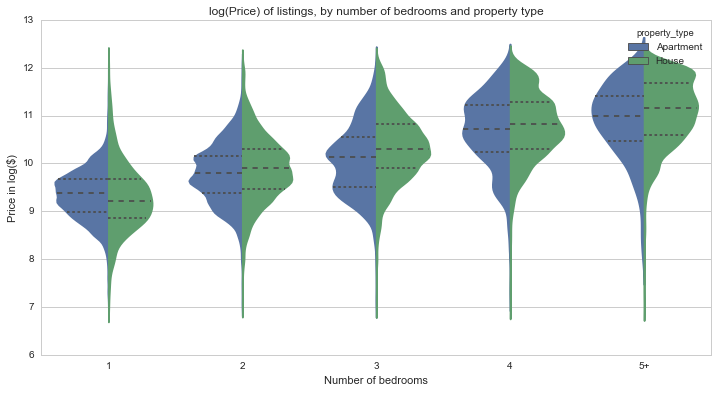

In [30]:
plt.figure(figsize=(12,6))
sns.violinplot(x='num_bed', y=np.log(houses_and_apts.price), hue='property_type', data=houses_and_apts, split=True, inner="quart")

plt.title('log(Price) of listings, by number of bedrooms and property type')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price in log($)')

## Have listing prices gone up since 2011?

If asking prices are increasing over time, that could be a sign that property appreciation is occuring in Havana as a result of market forces.

(0, 50000)

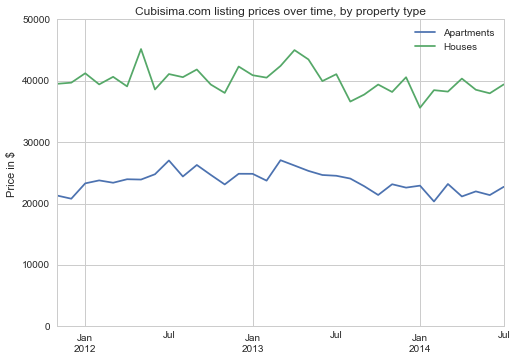

In [31]:
listings_dt = houses_and_apts.set_index(houses_and_apts.pub_date)
ax = listings_dt[listings_dt.property_type == 'Apartment']['price'].resample('M', how='mean').plot(label='Apartments')
listings_dt[listings_dt.property_type == 'House']['price'].resample('M', how='mean').plot(label='Houses')
legend = ax.legend(loc='upper right', shadow=True)

plt.xlabel('')
plt.ylabel('Price in $')
plt.title('Cubisima.com listing prices over time, by property type')
plt.ylim((0,50000))

Not so!

At least, not at first blush: viewed month by month, advertised prices for both property types remained steady during the first two and half years of the market's existence - or even declined slightly.

A more in-depth analysis would control for the types of properties coming the market - it could be prices are actually going up, but the median was dragged down by the introduction of less desirable properties when weekly listings spiked in 2013.

## Are some Havana neighborhoods more expensive than others?

What's the most important attribute in real estate?

*"Location, location, location!"* goes the old saw.

Let's see to what extent geography is playing a role on Cubisima asking prices. We'll focus on Havana, which has the country's most desirable building stock.

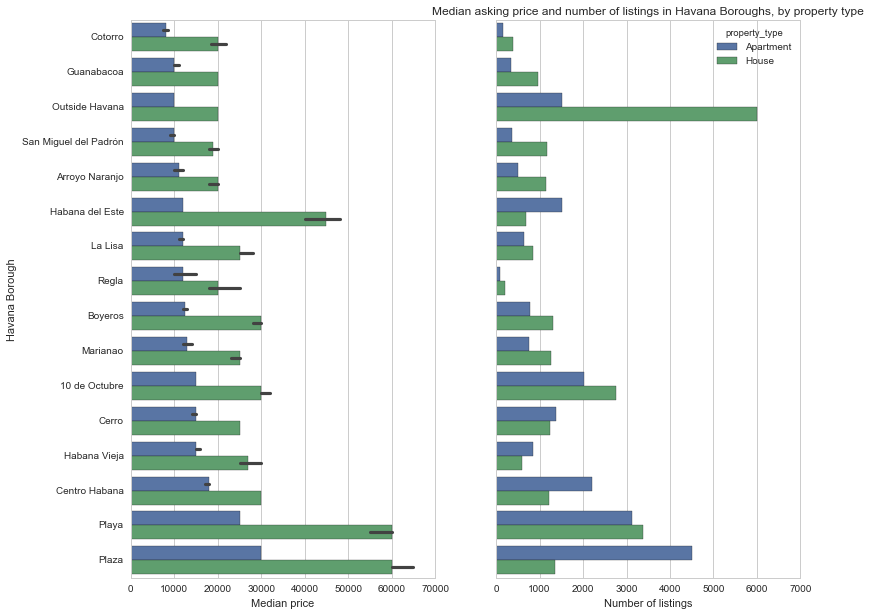

In [32]:
# Make side by side barplots of median price and listing counts.
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
house_price_order = houses_and_apts[houses_and_apts.property_type == 'Apartment']\
                                   .groupby('city')['price'].median().sort_values().index
sns.barplot(x='price', y='city', data=houses_and_apts, estimator=np.median, 
                                 order=house_price_order, hue='property_type', ax=ax1)

sns.countplot(y='city', data=houses_and_apts,
                                 order=house_price_order, hue='property_type', ax=ax2)

# Label the plots.
ax2.set_xlabel('Number of listings')
ax2.set_ylabel('')
ax1.legend_.remove()
ax1.set_xlabel('Median price')
ax1.set_ylabel('Havana Borough')
plt.title('Median asking price and number of listings in Havana Boroughs, by property type')
f.set_figwidth(12)
f.set_figheight(10)

**Apartments**

The boroughs in both plots are sorted from lowest to highest median apartment asking price.

As seen in the map below, the six boroughs with the most expensive median apartment prices are basically make up Havan's urbanized core - Plaza de La Revolucion, Playa, Centro Habana (Central Havana), Habana Vieja (Old Havana, the heart of the city), Cerro, and 10 Octubre.

The median apartment in Plaza is being advertised at \$30,000, and the medians for the other 5 boroughs range from \$15,000 - 20,000. By American standards, these will hardly break the bank.

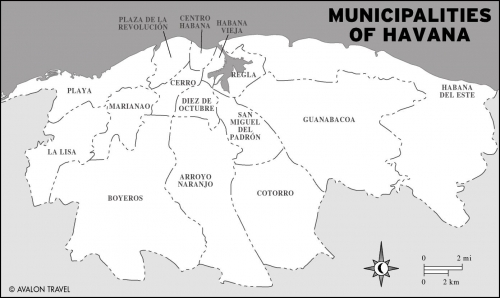

In [33]:
Image(url='https://havanaspecialperiod.files.wordpress.com/2012/04/cuba_02_municipalities-of-havana.jpg', embed=True)

**Houses**

Although it varies by neighborhood, asking prices for houses are roughly double those for apartments.

Playa and Plaza de la Republica have the most expensive houses as well as apartments, and the median house price in these boroughs is double that of other central Havana boroughs - and despite the comparably fewer houses for sales in Plaza de la Republica.

Asking prices aren't real sales prices, but this pattern nevertheless suggests that social stratification has already Havana. Or perhaps these boroughs were the most desirable ones in the region during the pre-market era, and that reality is simply cropping up in the price signal.

Surprisingly, Habana del Este, an area east of the central core and with scant population and few listings, has the third highest house asking prices in the metropolitain area.

Plaza De la Revolucion, Center Habana, Habana Vieja, Cerro, Diez de Octubre, parts of Playa.

## Which property characteristics drive the price of real estate?

What if we want to understand how the number of bedrooms of property affect it's price - independent of whether its a house or apartment, what amenities it may have, and so on?

We can model the relationship of a property's characteristics to its price using a linear regression, thus quantifying how much the change in one variable affects the price - in isolation from all the rest.

(Note: Given how heavy-tailed our price distribution is, we're going to model price in log space. That should make our residuals approximately normally distributed, which is necessary for our statistical significance tests to work.)

In [34]:
# Specify linear regression model. Log the response variable.
base_formula = '''np.log(price) ~ property_type + num_bed + num_bath  
                  + province + city + day_of_week + month + year'''

# Construct formula of 36 property amenity boolean variables. 
amenities_formula =' + '.join(amenity_variables)

formula = base_formula + ' + ' + amenities_formula
y, X = dmatrices(formula, data=houses_and_apts, return_type='dataframe')

In [35]:
# Regress logged price on property characteristics, amenities, location, and time variables.
model = sm.OLS(y, X)
results = model.fit()

In [36]:
# Print regression diagnostics.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     883.4
Date:                Tue, 02 Feb 2016   Prob (F-statistic):               0.00
Time:                        06:13:55   Log-Likelihood:                -33619.
No. Observations:               45299   AIC:                         6.740e+04
Df Residuals:                   45217   BIC:                         6.812e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------

## How To Interpret Model Coefficients

Because we logged the response variable (price), and we have so many dummy categorical values, the model coefficients must be interpreted as (approximately) **percent change** from the **predicted absolute price** of the **"baseline property"** reflected by the Intercept.

Our **baseline property** looks like this:

* Property type: Apartment
* Number of bedrooms: 1
* Number of bathrooms: 1
* City: 10 de Octubre, a Borough of Havana
* Region: Havana
* Day of week: Monday
* Month: January
* Year: 2011 (right after market started)
* Amenities: None

In [38]:
intercept_coef = results.params[0]
baseline_price = np.exp(intercept_coef + (.5 * results.mse_resid**2))
baseline_price

8905.9363029273773

The **predicted price** for this baseline property - a one bedroom apartment in 10 de Octubre - is ~\$8905. 

(By applying the above transformation, we can turn the Intercept of our log model into a dollar prediction in absolute terms.)

How much would a one-bedroom house in the same city cost?

Coefficients other than the intercept can be interpreted as the **percent change in the baseline price** when you move that variable and hold all others constant. For example, the coefficient for the "House" property type is 0.1946, so you'd expect the average 1 bedroom house to be 19% more expensive than an equivalent apartment in 10 de Octubre.

## Using Coefficients for Prediction

To turn this percent change into an actual dollar figure, add 1 to it and multiply it by the baseline price:

In [43]:
baseline_price * (1 + results.params['property_type[T.House]'])

10639.049079836435

So an equivalent house would cost \$10,639.

If you want to see how multiple variables affect price, you have the multiply the percent changes all together:

In [45]:
baseline_price * (1 + results.params['property_type[T.House]']) \
               * (1 + results.params['num_bed[T.2]']) \
               * (1 + results.params['city[T.Habana Vieja]'])

17128.437009005931

The average two-bedroom house with no amenities in old Havana, the heart of the city, will run you $17,128.

In other words, the coefficients compound - a 1 bedroom house is 19% more expensive than an apartment, a 2 bedroom house is 40% more expensive than that, and so on.

## Interpreting Model Results

The relationships described by our model - want whether they are statistically significant - will be easier to assess through coefficient plots.

In [46]:
# Remove intercept from coefficients.
coefs = results.params.reset_index().rename(columns={'index': 'variable', 0: 'coefficient'})
intercept = coefs.variable.str.contains('Intercept')
coefs = coefs[~intercept].sort_values('variable')

In [47]:
# Group coefficients by theme.
amenity_coefs = coefs[coefs.variable.str.contains('amenity')]
has_city = coefs.variable.str.contains('city\[') 
not_outside_havana = ~coefs.variable.str.contains('Outside') # Remove until coefficient fixed.
city_coefs = coefs[has_city & not_outside_havana]
has_day = coefs.variable.str.contains('day_')
has_month = coefs.variable.str.contains('month')
has_year = coefs.variable.str.contains('year')
time_coefs = coefs[has_day | has_month | has_year]
property_coefs = coefs.sort_index().loc[1:8]

In [48]:
def plot_coefs(coefs, sort_by):
    if 'amenity' in coefs.variable.iloc[1]:
        coefs.loc[:, 'variable'] = coefs.variable.str.replace('amenity_', '').str.replace('\[T.True\]', '')
    else:
        coefs.loc[:, 'variable'] = coefs.variable.str.replace('\[T.', ' - ').str.replace('\]', '')
    coefs.sort_values(sort_by, inplace=True)
    sns.barplot(coefs.coefficient, coefs.variable)
    plt.ylabel('Variable')
    plt.xlabel('Coefficient (% change in price)')

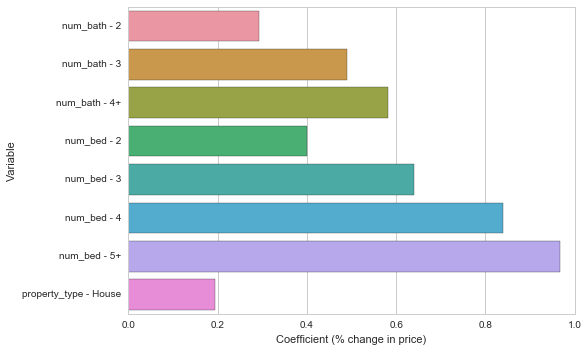

In [49]:
plot_coefs(property_coefs, 'variable')

All else being equal, houses cost 20% more than apartments on Cubisima.com.

The number of bedrooms has even even bigger impact - properties with two bedrooms are listed for 40% more than those with only 1, those with 3 bedrooms ask for 60% more than those with only 1, and so on.

These coefficients also confirm that the relationship between properties and number of bedrooms is non-linear - the marginal impact of adding another room diminishes as you add more rooms. The same relationship holds for number of bathrooms.

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


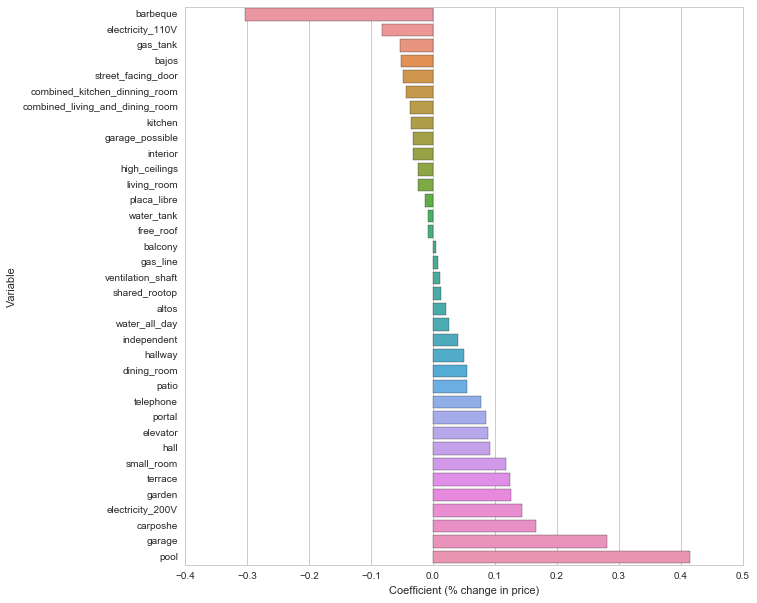

In [50]:
plt.figure(figsize=(10,10))
plot_coefs(amenity_coefs, 'coefficient')

The amenities results are super interesting. 

Luxury amenities have the bigger impact on asking price. Having a pool can balloon prices by 40%, a garage by 27% and a garden by 13%, an elevator by 9%.

200V electricity is clearly to be favored by the market over 100V - properties with the former cost roughly 20% more than the former. Properties that get gas and water from the grid have a small edge over those that get them from tanks.

A front door that faces the street, a combined kitchen-dining room, and combined living-dining room are all viewed as disamenities. Curiously, so is having a barbeque - that shrinks asking price by a whoping 30%.

Overall, many of the amenities have sizable effects, and because most properties list several, these variables jointly add a lot of explanatory power to the model.

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


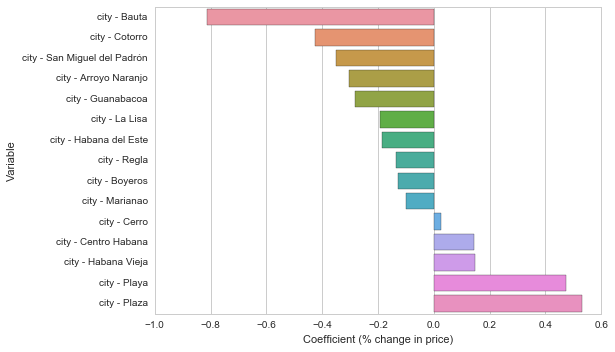

In [51]:
plot_coefs(city_coefs, 'coefficient')

Location within Havana - or outside of it - can have a big impact on asking price.

(Keep in mind, these coefficients are all relative to 10 de Octubre, a Havana borough south of the City center. In our plot median price by borough plot, it was ranked 6th out of 16 most expensive.)

Properties close to the city's heart, in Central or Old Havana, cost 15% more than 10 de Octubre. Those in Playa or Plaza de la Republica, 50% more.

Apartments and houses in Marianao, Boyeros, and Regla, boroughs on the edges of the City of Havana, cost about 10% less. Properties in outlying areas like Habana del Este and Arroyo Naranjo cost between 20 and 40% less.

Overall, the closer you get to Havan's core, the higher the listing price. Playa and Plaza de la Republica clearly emerge as the two most desirable areas of the Havan region.

The fact that most properties sell for under \$50,000 somewhat dampens the significance of location. The median price for a property is \$22,000. All else being equal, the same property would be worth be worth \$13,000 in Cotorro and \$33,000 in Plaza. That's over twice as much in percentage terms, but not a huge range in dollar term. Then again, that's a lot of dough in Cuba.

/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jpvelez/anaconda/envs/cubisima/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


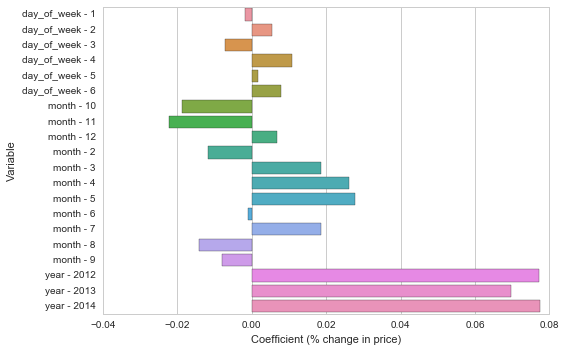

In [52]:
plot_coefs(time_coefs, 'variable')

The time variables don't do much for us. Listings may sell for slightly more - 2% - than January during the spring months. Except for April and May, though, none of the day of week and month variables are statistically significant. 

The year dummy variables all grow the 2011 price by between 2 and 12 percent. This makes sense, because there were very few properties listed in 2011, and the prices were on average lower than in later years.

## Goodness of Fit

In [53]:
results.rsquared

0.61277573179919642

How well does our model fit the data? The model's R2 score is .61, meaning over half of the variance in log(price) can is explained by the variables we picked.

This surprisingly high score might diminish by 10-20% when calculated from a different sample. And there are still plenty of forces affecting the asking price that we can't account for - including, no doubt, a lack of comparable transaction for sellers to base price on.

But the fact that our simple model can explain roughly half the variation in price suggests that select fields on Cubisima listings could represent some of the core economic variables behind prices.

## Residual analysis

*Coming soon!*

(-3, 3)

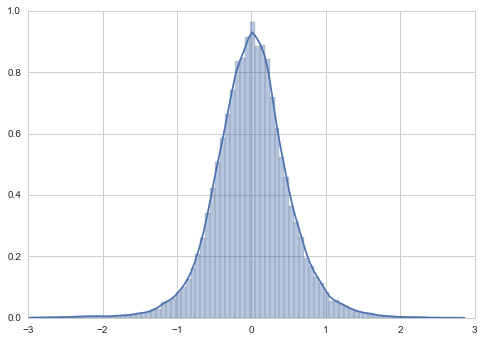

In [54]:
sns.distplot(results.resid, bins=100)
plt.xlim((-3,3))

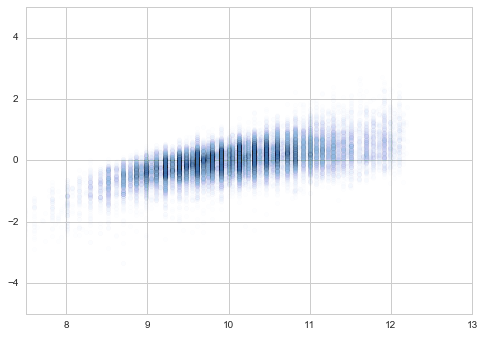

In [55]:
plt.scatter(y, results.resid, alpha=.01)
fig = plt.gcf()
plt.ylim((-5, 5))
plt.xlim((7.5, 13))
plt.figure(figsize=(3,5))

(8, 14)

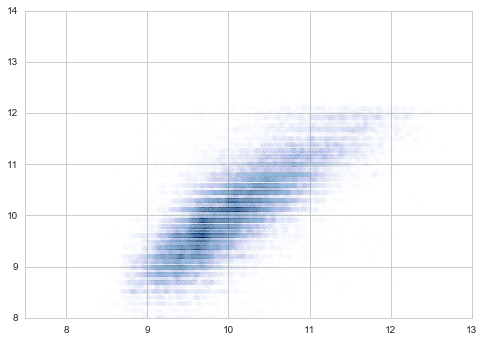

In [56]:
plt.scatter(results.predict(X), y, alpha=.01)
plt.xlim((7.5, 13))
plt.ylim((8, 14))